### Classify the customer based on their consumtpion 
#### If the customer is buying the product repeatly the sale is increasing which is +ve, Where we can target the custome to promote our other items
#### If the customer is consumption is reducting , Which is -ve, We need to look into why the sales is getting dropded



In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,spectral_clustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,silhouette_samples,silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import metrics
#import tensorflow as tf
#import tensorflow_decision_forests as tfdf

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [95]:
df=pd.read_excel('CaseStudyData.xlsx')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26133 entries, 0 to 26132
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Region                    26133 non-null  object 
 1   Customer ID               26133 non-null  int64  
 2   Trade Category            26133 non-null  int64  
 3   Channel                   26133 non-null  int64  
 4   Year                      26133 non-null  int64  
 5   Month                     26133 non-null  int64  
 6   Sales Volume              26133 non-null  float64
 7   Sales Value               26133 non-null  float64
 8   Margin                    26133 non-null  float64
 9   Wastage Volume            26133 non-null  float64
 10  Wastage Value             26133 non-null  float64
 11  Dairy Volume              26133 non-null  float64
 12  Juice Volume              26133 non-null  float64
 13  Bakery Volume             26133 non-null  float64
 14  Food V

In [99]:
df.nunique()

Region                          1
Customer ID                  4985
Trade Category                  3
Channel                         4
Year                            1
Month                           6
Sales Volume                25685
Sales Value                 25490
Margin                      25936
Wastage Volume              22597
Wastage Value               20928
Dairy Volume                24891
Juice Volume                22491
Bakery Volume               10233
Food Volume                 14171
Poultry Volume                900
Total Visits                   98
Visits per Week               202
Sub Categories Purchased       40
Contribution Percentage     26125
Wastage Percentage          23072
dtype: int64

In [125]:
df.drop_duplicates()

,Trade Category,Channel,Month,Sales Volume,Sales Value,Margin,Wastage Volume,Wastage Value,Dairy Volume,Juice Volume,Bakery Volume,Food Volume,Poultry Volume,Total Visits,Visits per Week,Sub Categories Purchased,Contribution Percentage,Wastage Percentage
0,20,100,9,1044.471971,5401.468072,2867.359014,31.995478,186.477148,621.468433,423.003538,0.0,0.000000,0.0,14,2.800000,10,0.421350,0.029723
1,20,100,8,867.853528,4412.508100,2354.463147,14.995772,77.616968,496.090208,371.763320,0.0,0.000000,0.0,10,2.500000,11,0.383140,0.016986
2,20,100,10,749.176920,3914.522612,2043.592334,28.800146,193.916008,457.093202,292.083718,0.0,0.000000,0.0,11,2.750000,10,0.379753,0.037019
3,20,100,12,970.721781,4968.866760,2510.985131,36.361460,203.192704,653.141224,314.700546,0.0,2.880012,0.0,16,2.666667,11,0.380120,0.036106
4,20,100,7,934.436635,4872.025444,2593.390394,20.009969,130.894764,582.852848,349.083787,0.0,2.500000,0.0,12,3.000000,10,0.391238,0.020965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26128,20,100,9,761.046851,3933.766408,1907.695849,109.090096,605.066176,555.252428,205.384414,0.0,0.410009,0.0,19,3.800000,10,0.396703,0.125371
26129,20,100,11,401.794659,2325.727976,962.126169,111.007027,571.275276,296.743655,87.830925,0.0,17.220080,0.0,19,4.750000,15,0.269919,0.216472
26130,20,100,8,878.502777,4545.853312,2383.502879,56.007442,299.226928,506.906696,367.686055,0.0,3.910025,0.0,16,4.000000,14,0.418003,0.059932
26131,20,100,10,477.757171,2492.698780,1085.195524,100.744712,543.591048,360.143717,112.622361,0.0,4.991093,0.0,16,4.000000,15,0.301549,0.174148


In [126]:
df.shape

(26133, 18)

#### Since there is no missing data in the dataset lets proceed with observation 

### Observation
The Dataset contains features like region and year, Both features has same values accross the dataset so we can drop these features from data set

In [127]:
df.head()

,Trade Category,Channel,Month,Sales Volume,Sales Value,Margin,Wastage Volume,Wastage Value,Dairy Volume,Juice Volume,Bakery Volume,Food Volume,Poultry Volume,Total Visits,Visits per Week,Sub Categories Purchased,Contribution Percentage,Wastage Percentage
0,20,100,9,1044.471971,5401.468072,2867.359014,31.995478,186.477148,621.468433,423.003538,0.0,0.000000,0.0,14,2.800000,10,0.421350,0.029723
1,20,100,8,867.853528,4412.508100,2354.463147,14.995772,77.616968,496.090208,371.763320,0.0,0.000000,0.0,10,2.500000,11,0.383140,0.016986
2,20,100,10,749.176920,3914.522612,2043.592334,28.800146,193.916008,457.093202,292.083718,0.0,0.000000,0.0,11,2.750000,10,0.379753,0.037019
3,20,100,12,970.721781,4968.866760,2510.985131,36.361460,203.192704,653.141224,314.700546,0.0,2.880012,0.0,16,2.666667,11,0.380120,0.036106
4,20,100,7,934.436635,4872.025444,2593.390394,20.009969,130.894764,582.852848,349.083787,0.0,2.500000,0.0,12,3.000000,10,0.391238,0.020965


In [128]:
columns_to_drop = df.columns[df.nunique() == 1]

In [129]:
df.drop(columns=columns_to_drop, inplace=True)
#columns_to_drop_two=['Dairy Volume','Juice Volume','Bakery Volume','Food Volume','Poultry Volume']
columns_to_drop_two=['Customer ID']
df.drop(columns=columns_to_drop_two, inplace=True)

KeyError: "['Customer ID'] not found in axis"

### Groupby Customer


In [55]:
Customer_group_data = df.groupby("Customer ID")
Customer_Data = Customer_group_data.agg({'Sales Volume': 'sum','Sales Value': 'sum','Margin': 'sum','Wastage Volume': 'sum','Wastage Value': 'sum','Total Visits': 'sum', 'Month': 'count','Sub Categories Purchased': 'sum','Contribution Percentage': 'sum','Wastage Percentage': 'sum'}).reset_index()
#Customer_Data.reset_index(inplace=True)
Customer_Data.describe()
Customer_Data.shape
Customer_Data.head()

,Customer ID,Sales Volume,Sales Value,Margin,Wastage Volume,Wastage Value,Total Visits,Month,Sub Categories Purchased,Contribution Percentage,Wastage Percentage
0,25065550,5283.577461,27227.472272,14230.514598,167.422888,991.167320,75,6,60,2.313442,0.187676
1,25066275,44017.181866,277376.341530,139895.973980,1986.019111,19093.803300,215,6,174,2.336939,0.261705
2,25066300,13784.793024,82381.086218,43247.377343,711.994014,5443.757748,125,6,152,2.388569,0.311718
3,25066325,9531.236122,49927.683526,24684.270524,781.302065,4943.662152,149,6,70,2.058892,0.473641
4,25066825,506.606349,3111.796688,619.421179,0.000000,0.000000,19,6,11,0.360360,0.000000


In [113]:
len(df.columns)

18

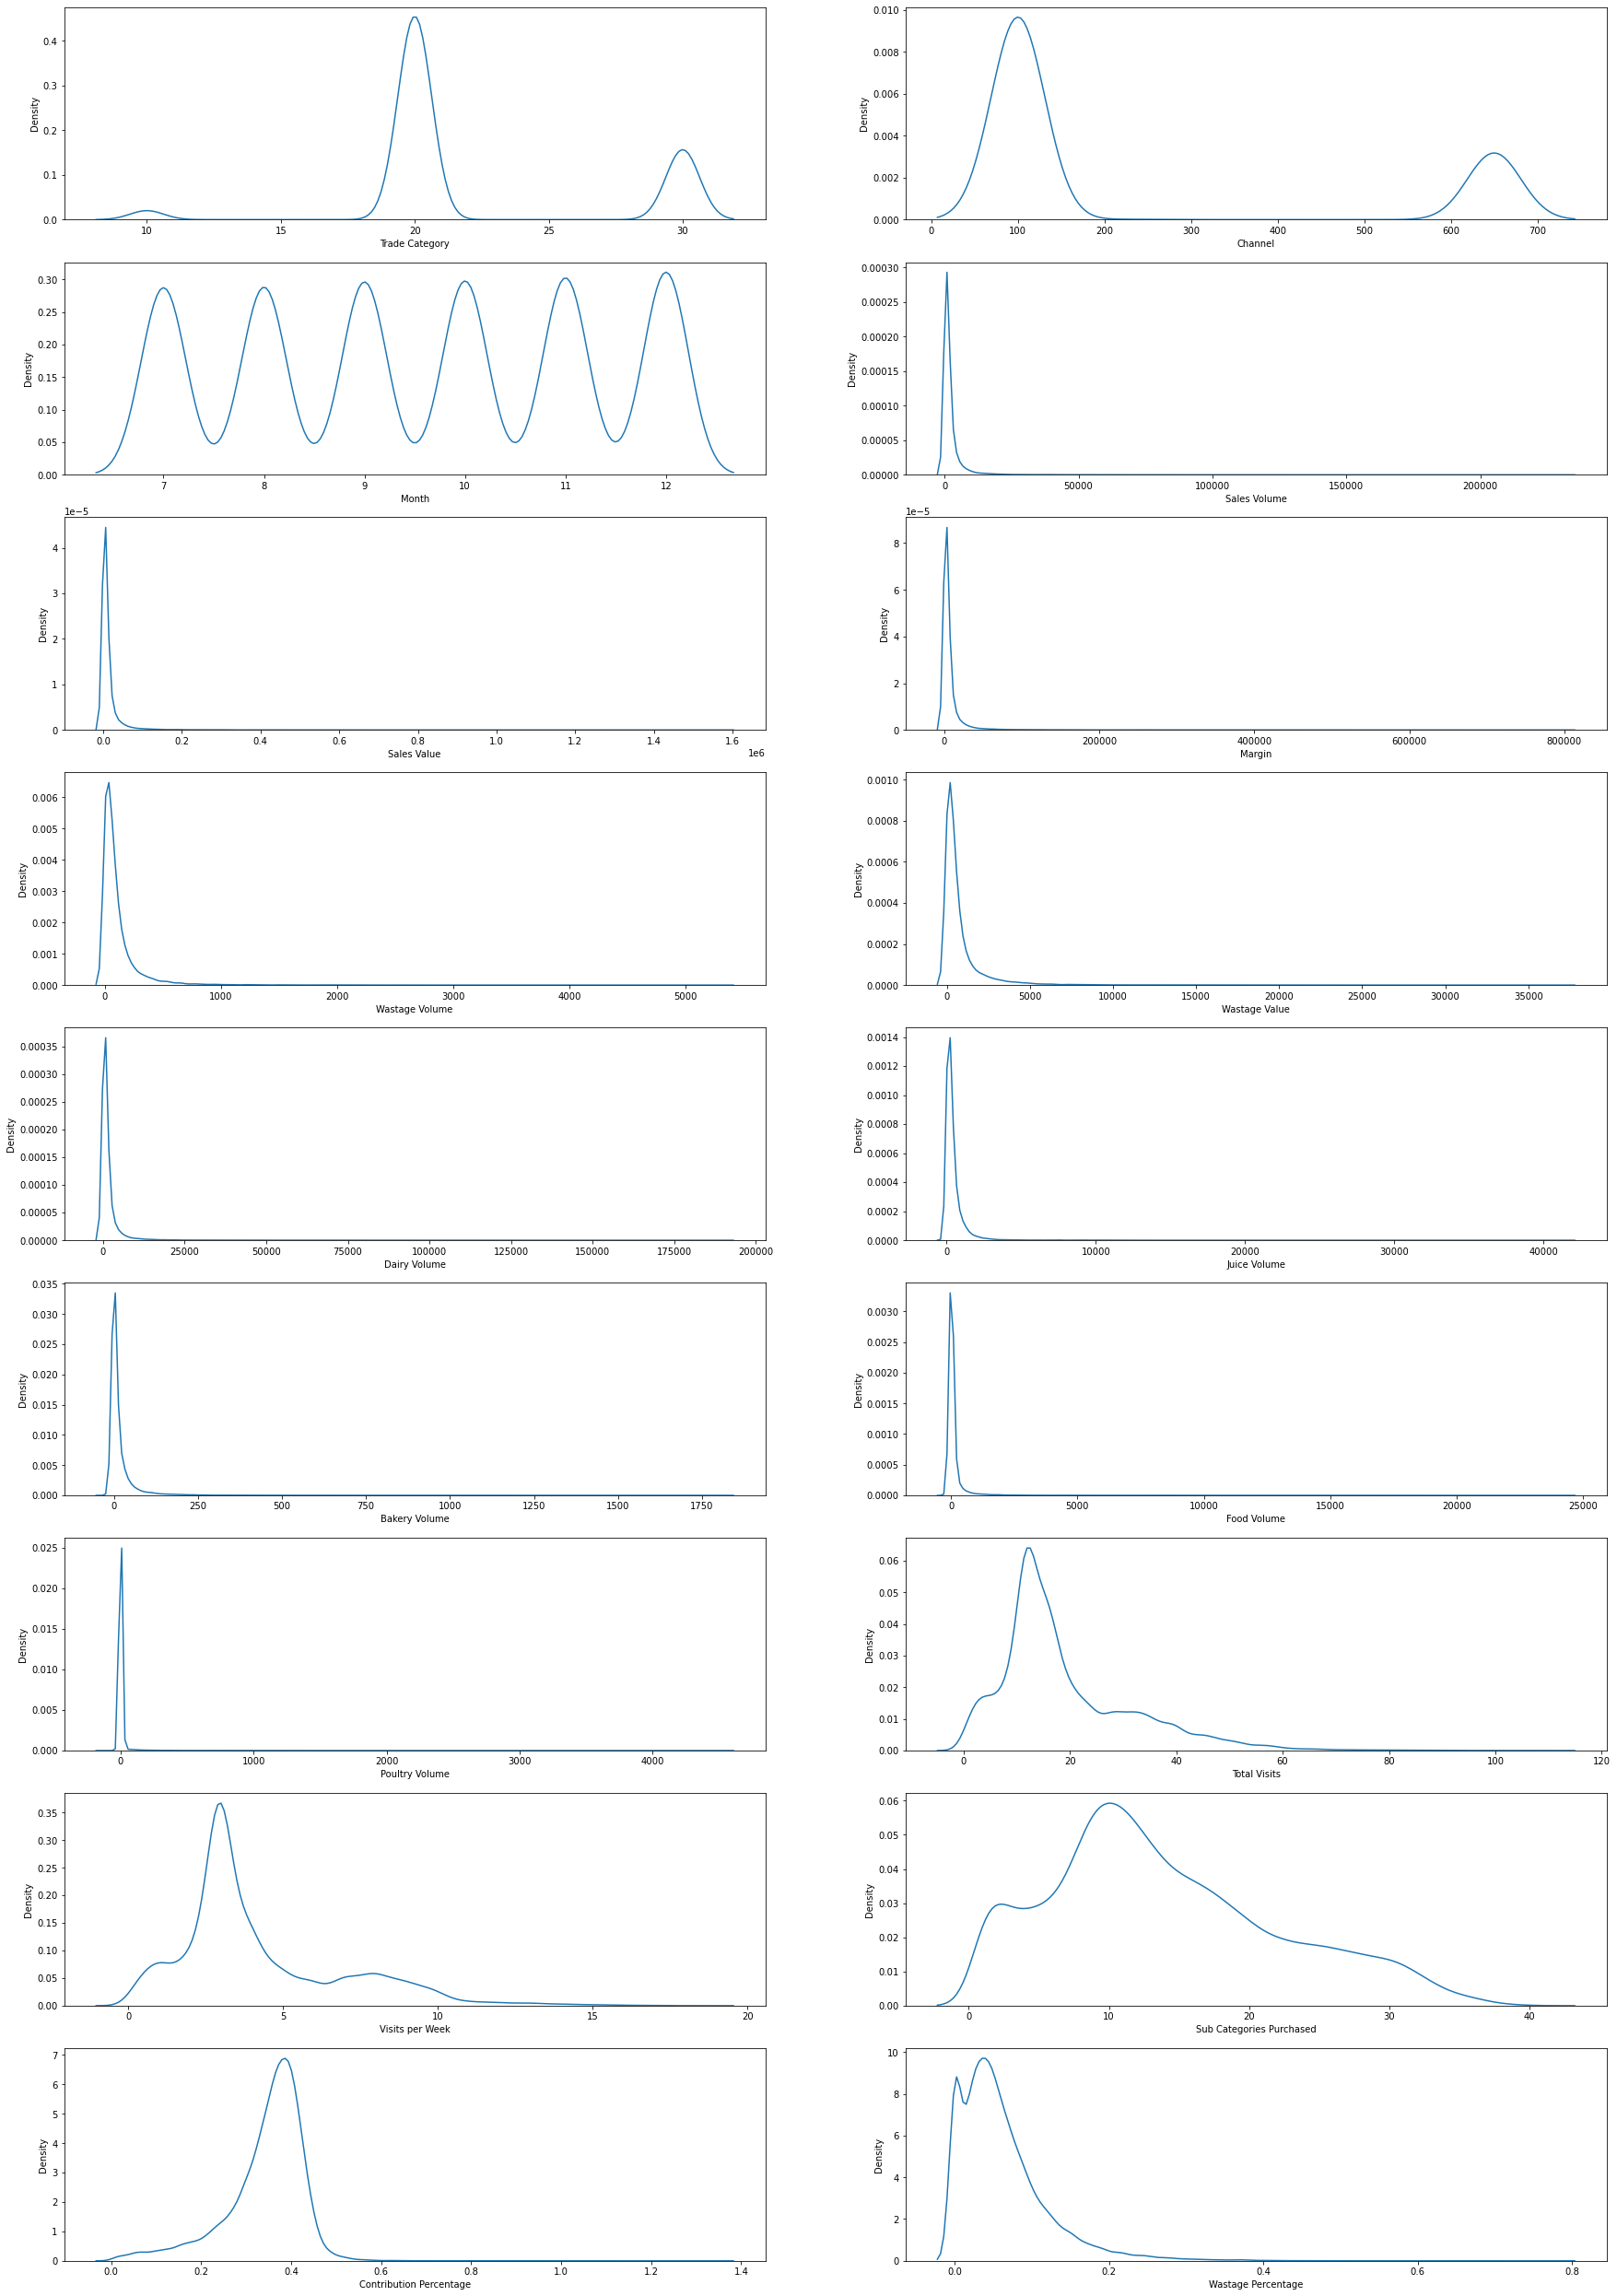

In [111]:
plt.figure(figsize=(30,45))
for i,col in enumerate(df.columns):
    if df[col].dtype!='object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show()

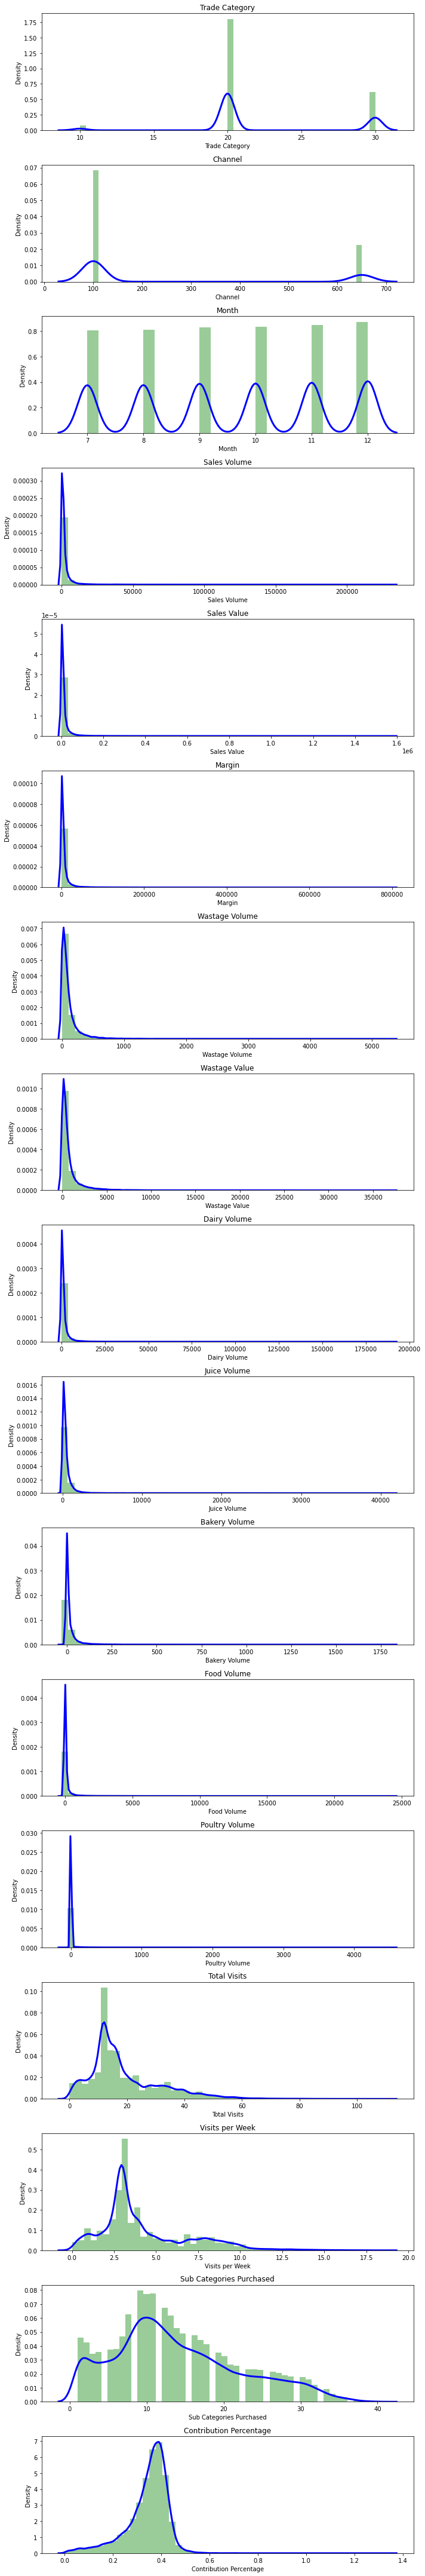

In [117]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw':0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()  

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26133 entries, 0 to 26132
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trade Category            26133 non-null  int64  
 1   Channel                   26133 non-null  int64  
 2   Month                     26133 non-null  int64  
 3   Sales Volume              26133 non-null  float64
 4   Sales Value               26133 non-null  float64
 5   Margin                    26133 non-null  float64
 6   Wastage Volume            26133 non-null  float64
 7   Wastage Value             26133 non-null  float64
 8   Dairy Volume              26133 non-null  float64
 9   Juice Volume              26133 non-null  float64
 10  Bakery Volume             26133 non-null  float64
 11  Food Volume               26133 non-null  float64
 12  Poultry Volume            26133 non-null  float64
 13  Total Visits              26133 non-null  int64  
 14  Visits

In [133]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)
#kmeans_model.fit(df[['Month','Dairy Volume','Juice Volume','Bakery Volume','Food Volume','Poultry Volume','Total Visits','Visits per Week','Wastage Volume','Trade Category','Channel']])
kmeans_model.fit(df[['Month','Margin','Contribution Percentage','Dairy Volume','Juice Volume','Bakery Volume','Food Volume','Poultry Volume','Total Visits','Wastage Volume','Trade Category','Channel']])


KMeans(max_iter=400, random_state=42)

In [119]:
scalar=StandardScaler()
scaled_df=scalar.fit_transform(df)

In [121]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-0.765097,-0.297497
1,-0.966994,-0.081622
2,-0.933518,-0.212314
3,-0.750468,-0.354367
4,-0.885361,-0.146921
...,...,...
26128,-0.505430,-0.917757
26129,-0.467350,-1.364033
26130,-0.507418,-0.762855
26131,-0.577465,-1.107373


### Use Elbow Method to find optimal number of clusters

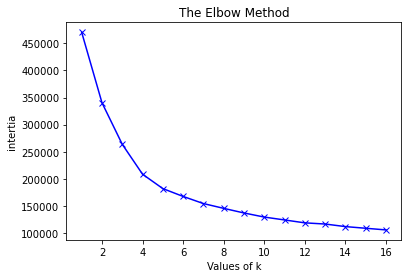

In [123]:
intertia=[]
for i in range(1,17):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    intertia.append(kmeans.inertia_)
plt.plot(range(1,17),intertia,'bx-')
plt.xlabel('Values of k')
plt.ylabel('intertia')
plt.title('The Elbow Method')
plt.show()

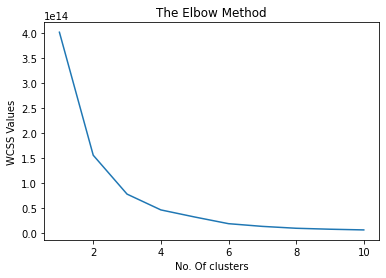

In [87]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('No. Of clusters')
plt.ylabel('WCSS Values')
plt.title('The Elbow Method')
plt.show()

In [89]:
n_cluster=4
#X=Customer_Data['Sales Value','Margin','Total Visits']
kmeans=KMeans(n_clusters=n_cluster)
label=kmeans.fit_predict(X)
print(label)

[0 3 0 ... 0 0 0]


In [90]:
print(kmeans.cluster_centers_)

[[  36882.35235391   18734.54942281]
 [1527050.33999579  773703.93649474]
 [4163423.09665    2107621.8463    ]
 [ 400560.77380091  206073.00170359]]


ValueError: x and y must be the same size

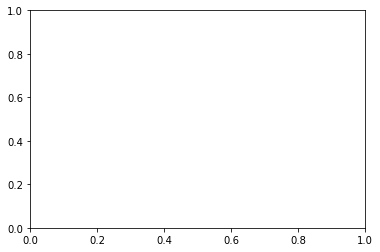

In [92]:
plt.scatter(X[:0],X[:1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:0],kmeans.cluster_centers_[:1],color='black')
plt.title('111')
plt.xlabel('sss')
plt.ylabel('sss')
plt.show()



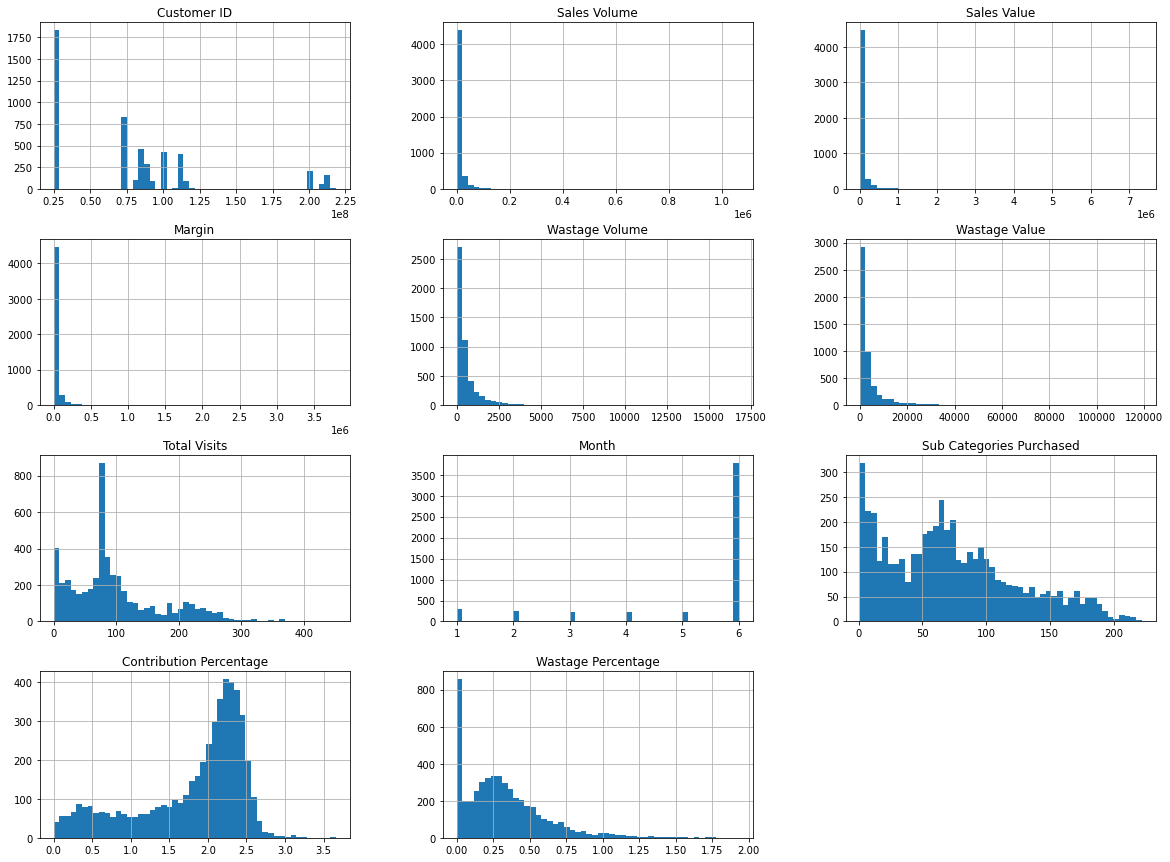

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
Customer_Data.hist(bins=50, figsize=(20,15))
plt.show()

In [48]:
#df['Margin in Percentage']=(df['Margin']/df['Sales Value'])*100
#df.info()

In [20]:
df['Total Volume']=df[['Dairy Volume','Juice Volume','Bakery Volume','Food Volume','Poultry Volume']].sum(axis=1)
#df['new_column'] = df['Total Volume'].equals(df['Sales Volume'])


In [21]:
grouping = df.groupby('Customer ID')['Month']

In [24]:
df['CohortMonth'] = grouping.transform('min')
df.tail()

,Customer ID,Trade Category,Channel,Month,Sales Volume,Sales Value,Margin,Wastage Volume,Wastage Value,Dairy Volume,...,Food Volume,Poultry Volume,Total Visits,Visits per Week,Sub Categories Purchased,Contribution Percentage,Wastage Percentage,Margin in Percentage,Total Volume,CohortMonth
26128,218250075,20,100,9,761.046851,3933.766408,1907.695849,109.090096,605.066176,555.252428,...,0.410009,0.0,19,3.80,10,0.396703,0.125371,48.495402,761.046851,7
26129,218250075,20,100,11,401.794659,2325.727976,962.126169,111.007027,571.275276,296.743655,...,17.220080,0.0,19,4.75,15,0.269919,0.216472,41.368818,401.794659,7
26130,218250075,20,100,8,878.502777,4545.853312,2383.502879,56.007442,299.226928,506.906696,...,3.910025,0.0,16,4.00,14,0.418003,0.059932,52.432464,878.502777,7
26131,218250075,20,100,10,477.757171,2492.698780,1085.195524,100.744712,543.591048,360.143717,...,4.991093,0.0,16,4.00,15,0.301549,0.174148,43.534964,477.757171,7
26132,218250075,20,100,7,629.256689,3585.686104,1768.096783,70.285654,468.832936,428.258987,...,19.092004,0.0,17,4.25,17,0.382534,0.100474,49.309860,629.256689,7


In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_month = df['Month']
cohort_month = df['CohortMonth']

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

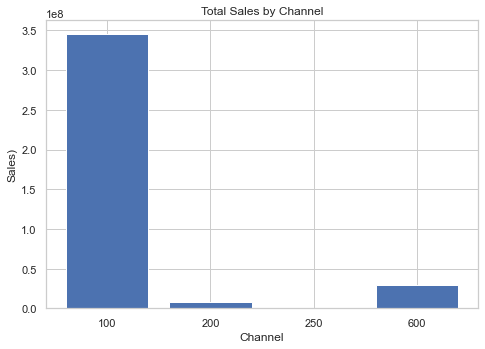

In [265]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales_by_Channel = df.groupby(['Channel']).sum()['Sales Value'].reset_index()
ax.bar(['100','200','250','600'],sales_by_Channel['Sales Value'])
plt.title('Total Sales by Channel')
plt.xlabel('Channel')
plt.ylabel('Sales)')
plt.show()


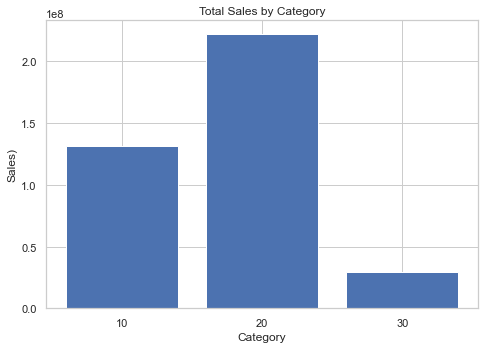

In [269]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales_by_Category = df.groupby(['Trade Category']).sum()['Sales Value'].reset_index()
ax.bar(['10','20','30'],sales_by_Category['Sales Value'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales)')
plt.show()

In [238]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sales_by_Category = df.groupby(['Trade Category']).sum()['Sales Value'].reset_index()
ax.plot(df[],sales_by_Category['Sales Value'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales)')
plt.show()

array([100, 650, 200, 250], dtype=int64)

In [196]:
# Fit K-means model
#kmeans = KMeans(n_clusters=5)
#kmeans.fit(df[['Sales Value']])

# Add cluster labels to DataFrame
#df['Cluster'] = kmeans.labels_

# Visualize the clusters
#plt.scatter(df['Customer ID'], df['Sales Value'], c=df['Cluster'], cmap='rainbow')
#plt.xlabel('Customer ID')
#plt.ylabel('Sales Value')
#plt.title('Customer Segmentation using K-means Clustering')
#plt.show()

In [197]:
#df.groupby(['Month'])['Sales Value'].agg(['sum', 'mean', 'max','min']).reset_index()

In [198]:
#plt.figure(figsize=(10, 6))
#sns.set(style = 'whitegrid')
#sns.distplot(df['Sales Value'])
#plt.title('Distribution of Sales Value', fontsize = 20)
#plt.xlabel('Range of Sales Value')
#plt.ylabel('Count')

       Customer ID  Month  Sales Value
0         25065550      7  4872.025444
1         25065550      8  4412.508100
2         25065550      9  5401.468072
3         25065550     10  3914.522612
4         25065550     11  3658.081284
...            ...    ...          ...
26128    218250075      8  4545.853312
26129    218250075      9  3933.766408
26130    218250075     10  2492.698780
26131    218250075     11  2325.727976
26132    218250075     12  2852.428436

[26133 rows x 3 columns]


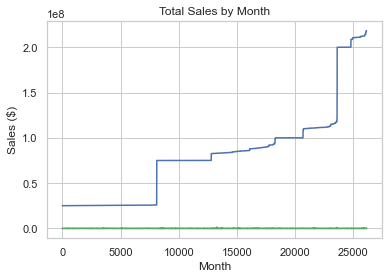

In [210]:
sales_by_month = df.groupby(['Customer ID','Month']).sum()['Sales Value'].reset_index()
print(sales_by_month)
# Create a line chart
plt.plot(sales_by_month.index, sales_by_month.values)

# Set the title and axis labels
plt.title('Total Sales by Month')
plt.xlabel('Month')


plt.ylabel('Sales ($)')

# Display the chart
plt.show()

In [178]:
customer_sales = df.groupby('Customer ID')['Sales Value'].agg(['sum', 'mean']).reset_index()

# Use total sales and average sales as features for clustering
X = df[['Customer ID', 'Sales Value','Total Visits']]
#X = df[['Total Visits', 'Sales Value']]
#X=df.iloc[:,[0,5]]
X.head()

,Customer ID,Sales Value,Total Visits
0,25065550,5401.468072,14
1,25065550,4412.508100,10
2,25065550,3914.522612,11
3,25065550,4968.866760,16
4,25065550,4872.025444,12


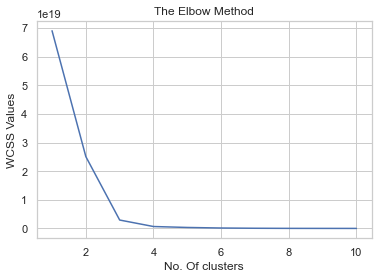

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

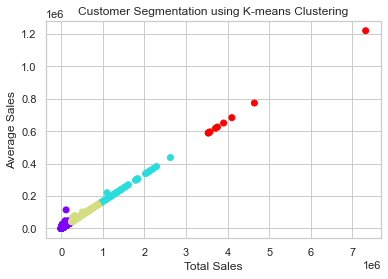

In [184]:
customer_sales = df.groupby('Customer ID')['Sales Value'].agg(['sum', 'mean','max','min']).reset_index()

# Use total sales and average sales as features for clustering
X = customer_sales[['sum', 'mean']]

# Fit K-means model
kmeans = KMeans(n_clusters=4)
customer_sales['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(customer_sales['sum'], customer_sales['mean'], c=customer_sales['Cluster'], cmap='rainbow')
plt.xlabel('Total Sales')
plt.ylabel('Average Sales')
plt.title('Customer Segmentation using K-means Clustering')
plt.show()
